In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas.io.json import json_normalize
import json

In [2]:
movies = "movie_data.csv"
movie_data = pd.read_csv(movies)
movie_data.head()

,Unnamed: 0,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,metacritic,synopsis,cast
0,0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018,88.0,"T'Challa, heir to the hidden but advanced king...","Chadwick Boseman, Michael B. Jordan, Lupita Ny..."
1,1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018,68.0,The Avengers and their allies must be willing ...,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa..."
2,2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018,80.0,The Incredibles hero family takes on a new mis...,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H..."
3,3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018,51.0,When the island's dormant volcano begins roari...,"Chris Pratt, Bryce Dallas Howard, Rafe Spall, ..."
4,4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018,66.0,Foul-mouthed mutant mercenary Wade Wilson (a.k...,"Ryan Reynolds, Josh Brolin, Morena Baccarin, J..."


In [16]:
ratings_data = movie_data[["title", "worldwide_gross", "imdb_rating", "metacritic"]].copy()
ratings_data.loc[:,"imdb_ratings_adj"] = ratings_data.loc[:,"imdb_rating"]*10
ratings_data.loc[:,"worldwide_gross_adj"] = ratings_data.loc[:,"worldwide_gross"]/100_000_000
ratings_data


,title,worldwide_gross,imdb_rating,metacritic,imdb_ratings_adj,worldwide_gross_adj
0,Black Panther,700059566.0,7.4,88.0,74.0,7.000596
1,Avengers: Infinity War,678815482.0,8.5,68.0,85.0,6.788155
2,Incredibles 2,608581744.0,7.8,80.0,78.0,6.085817
3,Jurassic World: Fallen Kingdom,416769345.0,6.2,51.0,62.0,4.167693
4,Deadpool 2,318491426.0,7.8,66.0,78.0,3.184914
...,...,...,...,...,...,...
93,Madagascar: Escape 2 Africa,603900354.0,6.7,61.0,67.0,6.039004
94,Quantum of Solace,586090727.0,6.7,58.0,67.0,5.860907
95,Iron Man,585174222.0,7.9,79.0,79.0,5.851742
96,WALL-E,521311860.0,8.4,95.0,84.0,5.213119


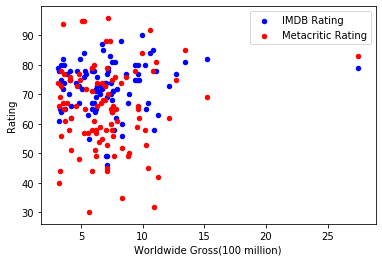

In [17]:
# Create a Scatter Plot for imdb_rating vs metacritic
ax = ratings_data.plot(kind="scatter", x="worldwide_gross_adj",y="imdb_ratings_adj", color="b", label="IMDB Rating")
ratings_data.plot(x="worldwide_gross_adj",y=("metacritic"), color="r", kind = "scatter", label="Metacritic Rating", ax=ax)
plt.xlim()
plt.xlabel('Worldwide Gross(100 million)')
plt.ylabel('Rating')
plt.show()
